## PROYECTO FIFA - Grupo 5

### Objetivo: 
Agrupar a los jugadores en clusters basados en su overall (este puntaje incluye características como la posición, la puntuación general, la edad, el valor de mercado, etc). Esto nos puede ayudar a identificar y analizar diferentes tipos de jugadores y valor en el mercado.

<font size=5>  👩🏽‍💻  Procesamiento de datos </font>



In [4]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#Importa las librerias matplotlib, seaborn y Scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import matplotlib.cm as cm
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [95]:
# Leemos los datos

In [5]:
fifa = pd.read_csv('fifa_22.csv', encoding='latin1')

In [6]:
#Accedemos al tipo de estrutura de datos con el type.

In [7]:
type(fifa)

pandas.core.frame.DataFrame

In [8]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

fifa.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [9]:
#evaluamos valores nulos
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(18), int64(44), object(48)
memory usage: 16.1+ MB


In [101]:
#Tranformamos los tipos de datos object por strings. 

fifa['short_name'] = fifa['short_name'].astype("string")
fifa['long_name'] = fifa['long_name'].astype("string")
fifa['player_positions'] = fifa['player_positions'].astype("string")
fifa['club_name'] = fifa['club_name'].astype("string")
fifa['league_name'] = fifa['league_name'].astype("string")
fifa['club_position'] = fifa['club_position'].astype("string")
fifa['nationality_name'] = fifa['nationality_name'].astype("string")
fifa['nation_position'] = fifa['nation_position'].astype("string")
fifa['preferred_foot'] = fifa['preferred_foot'].astype("string")
fifa['work_rate'] = fifa['work_rate'].astype("string")
fifa['ldm'] = fifa['ldm'].astype("string")
fifa['cdm'] = fifa['cdm'].astype("string")
fifa['rdm'] = fifa['rdm'].astype("string")
fifa['rwb'] = fifa['rwb'].astype("string")
fifa['lb'] = fifa['lb'].astype("string")
fifa['lcb'] = fifa['lcb'].astype("string")
fifa['cb'] = fifa['cb'].astype("string")
fifa['rcb'] = fifa['rcb'].astype("string")
fifa['rb'] = fifa['rb'].astype("string")
fifa['gk'] = fifa['gk'].astype("string")
fifa['player_tags'] = fifa['player_tags'].astype("string")
fifa['player_traits'] = fifa['player_traits'].astype("string")


fifa.dtypes

sofifa_id            int64
player_url          object
short_name          string
long_name           string
player_positions    string
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [10]:
#Columnas con tipo de datos 'object'
columns_objects = fifa.select_dtypes(include=['object'])

print(columns_objects)

                                              player_url          short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...            L. Messi   
1      https://sofifa.com/player/188545/robert-lewand...      R. Lewandowski   
2      https://sofifa.com/player/20801/c-ronaldo-dos-...   Cristiano Ronaldo   
3      https://sofifa.com/player/190871/neymar-da-sil...           Neymar Jr   
4      https://sofifa.com/player/192985/kevin-de-bruy...        K. De Bruyne   
...                                                  ...                 ...   
19234  https://sofifa.com/player/261962/defu-song/220002           Song Defu   
19235  https://sofifa.com/player/262040/caoimhin-port...           C. Porter   
19236  https://sofifa.com/player/262760/nathan-logue/...            N. Logue   
19237  https://sofifa.com/player/262820/luke-rudden/2...           L. Rudden   
19238  https://sofifa.com/player/264540/emanuel-lalch...  E. Lalchhanchhuaha   

                                 long_n

In [11]:
print(fifa.columns)
print(len(fifa.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [104]:
print(fifa.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

In [105]:
print(fifa.overall)

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64


47


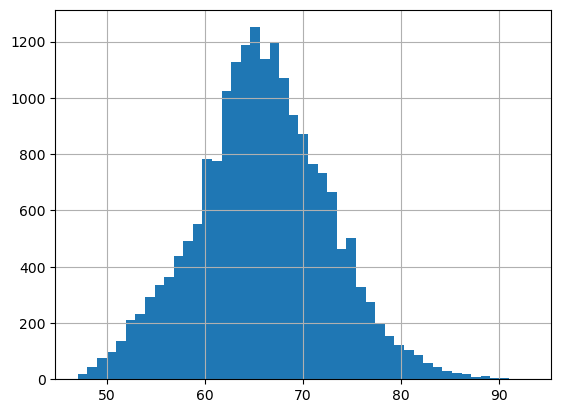

In [12]:
nbins=1*(fifa.overall.max()-fifa.overall.min())+1
fifa['overall'].hist(bins = nbins)
print(nbins)

In [107]:
best_players_per_position=fifa.iloc[fifa.groupby(fifa['player_positions'])['overall'].idxmax()][['player_positions','long_name','overall']]
best_players_per_position

,player_positions,long_name,overall
28,CAM,Bruno Miguel Borges Fernandes,88
2052,"CAM, CDM",Pajtim Kasami,74
2711,"CAM, CDM, CM",Andrés Ricaurte Vélez,73
1589,"CAM, CDM, LM",Alejandro Fernández Iglesias,75
8515,"CAM, CDM, RM",Matías Nicolás Miranda,67
...,...,...,...
105,"ST, RW",Iago Aspas Juncal,84
536,"ST, RW, CAM",???,79
12731,"ST, RW, LM",Papis Malaly Dembélé,63
888,"ST, RW, LW",Alan Kardec de Souza Pereira Junior,77


In [13]:
n=10000 #cantidad de jugadores a considerar

fifa_n=fifa.loc[:n] #se reduce la base a los n primeros jugadores

fifa_n=fifa_n[(fifa_n['overall']>70)]

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [14]:
MachineGunDict={'Name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

fifa_n=fifa_n.append(MachineGunDict,ignore_index=True)

print("Jugador con mejores habilidades:",MachineGunDict) 

Jugador con mejores habilidades: {'Name': 'MachineGun', 'overall': 99, 'Crossing': 99, 'Finishing': 99, 'HeadingAccuracy': 99, 'ShortPassing': 99, 'Volleys': 99, 'Dribbling': 99, 'Curve': 99, 'FKAccuracy': 99, 'LongPassing': 99, 'BallControl': 99, 'Acceleration': 99, 'SprintSpeed': 99, 'Agility': 99, 'Reactions': 99, 'Balance': 99, 'ShotPower': 99, 'Jumping': 99, 'Stamina': 99, 'Strength': 99, 'LongShots': 99, 'Aggression': 99, 'Interceptions': 99, 'Positioning': 99, 'Vision': 99, 'Penalties': 99, 'Composure': 99, 'Marking': 99, 'StandingTackle': 99, 'SlidingTackle': 99, 'GKDiving': 99, 'GKHandling': 99, 'GKKicking': 99, 'GKPositioning': 99, 'GKReflexes': 99}


In [110]:
JugadorPromedioDict={'Name':'JugadorPromedio','overall':fifa_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=fifa_n[skills].mean()

fifa_n=fifa_n.append(JugadorPromedioDict,ignore_index=True)

print("El jugador promedio cuenta con las siguientes caracteristicas",JugadorPromedioDict)

El jugador promedio cuenta con las siguientes caracteristicas {'Name': 'JugadorPromedio', 'overall': 74.76077492381367, 'Crossing': 99.0, 'Finishing': 99.0, 'HeadingAccuracy': 99.0, 'ShortPassing': 99.0, 'Volleys': 99.0, 'Dribbling': 99.0, 'Curve': 99.0, 'FKAccuracy': 99.0, 'LongPassing': 99.0, 'BallControl': 99.0, 'Acceleration': 99.0, 'SprintSpeed': 99.0, 'Agility': 99.0, 'Reactions': 99.0, 'Balance': 99.0, 'ShotPower': 99.0, 'Jumping': 99.0, 'Stamina': 99.0, 'Strength': 99.0, 'LongShots': 99.0, 'Aggression': 99.0, 'Interceptions': 99.0, 'Positioning': 99.0, 'Vision': 99.0, 'Penalties': 99.0, 'Composure': 99.0, 'Marking': 99.0, 'StandingTackle': 99.0, 'SlidingTackle': 99.0, 'GKDiving': 99.0, 'GKHandling': 99.0, 'GKKicking': 99.0, 'GKPositioning': 99.0, 'GKReflexes': 99.0}


In [15]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [16]:
fifa_skills=fifa_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [17]:
fifa_skills.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Convierte el arreglo de numpy en un DataFrame
fifa_df = pd.DataFrame(fifa)

# Ahora puedes acceder a las columnas y verificar los tipos de datos
print(fifa_df.dtypes)

# A partir de aquí, puedes trabajar con fifa_df como un DataFrame de pandas

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object


In [19]:
X = fifa.dropna()

In [20]:
# Cargar tus datos excluyendo la columna de URL
fifa = pd.read_csv('fifa_22.csv', usecols=['overall', 'value_eur'], encoding='latin-1')

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(fifa)
fifa_scaled = scaler.transform(fifa)

In [23]:
fifa_scaled = pd.DataFrame(data = fifa_scaled, columns = fifa.columns)

In [24]:
#Consideramos solo dos variables (Annual income and Spending Score) - no tenemos Label disponible
X= fifa_scaled.iloc[:, [0,1]].values

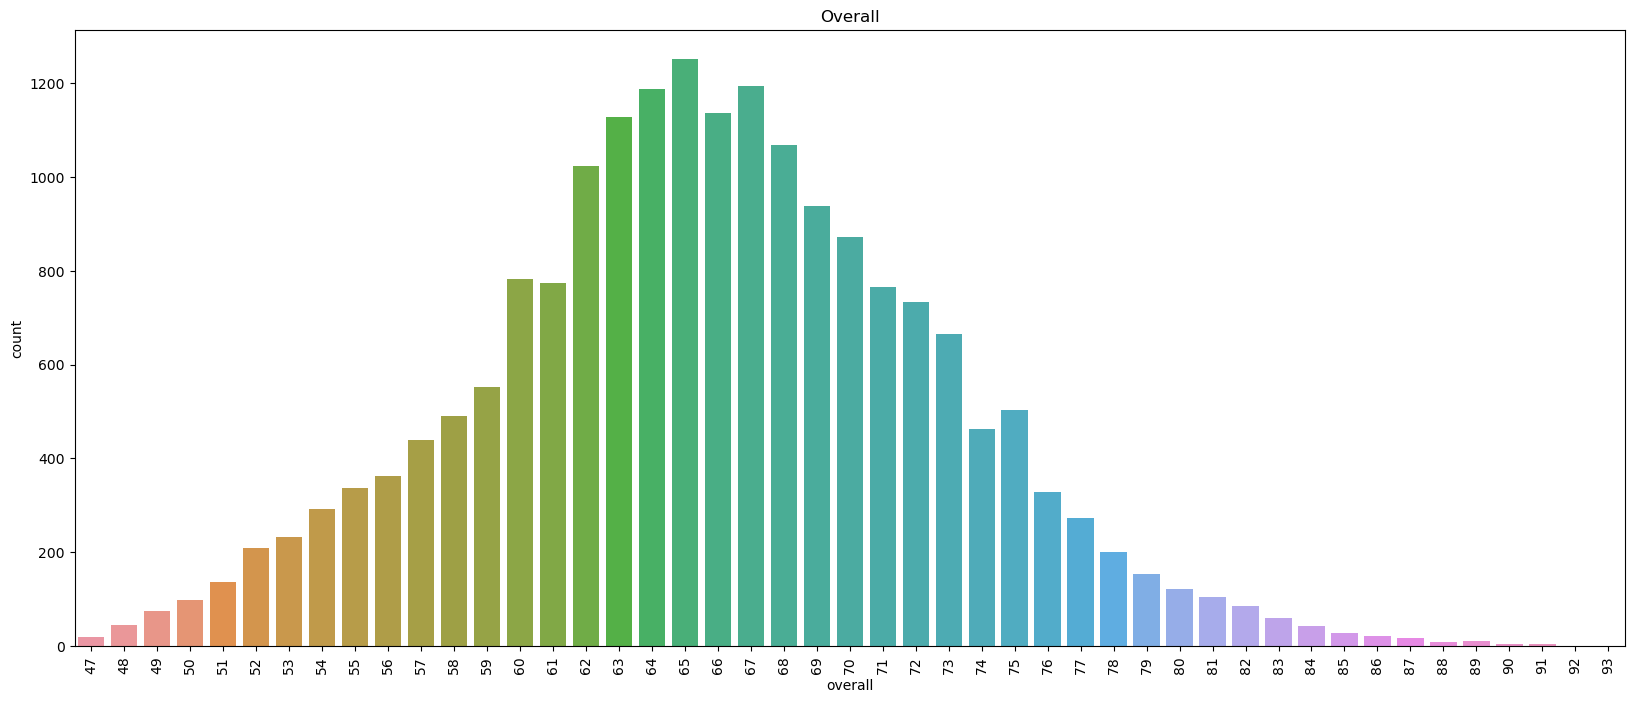

In [122]:
plt.figure(figsize = (20, 8))
sns.countplot(x="overall", data=fifa)
plt.title("Overall")
plt.xticks(rotation=90)
plt.show()

# K-MEANS

In [25]:
# Selecciona las variables
X = fifa[['overall', 'value_eur']]

In [26]:
# Especifica el número de clusters (K)
num_clusters = 4

# Crea un objeto KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [27]:
X = X.dropna()

In [28]:
# Aplicamos K-Means y entrenamos el modelo
kmeans.fit(X)


KMeans(n_clusters=4, random_state=0)

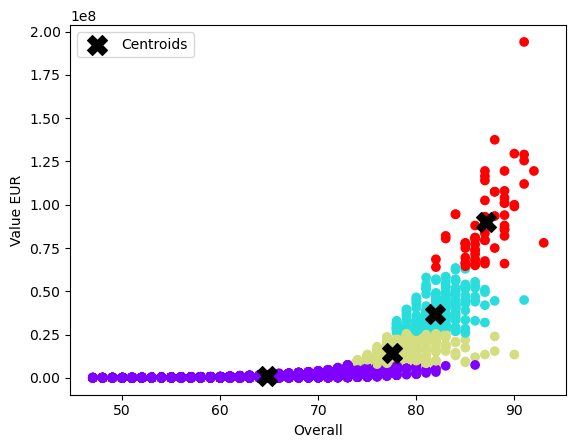

In [127]:

# Aplicamos K-Means y entrenamos el modelo
kmeans.fit(X)

# Etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Coordenadas de los centroides de los clusters
centroids = kmeans.cluster_centers_

# Plotea los datos y los clusters encontrados
plt.scatter(X['overall'], X['value_eur'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Overall')
plt.ylabel('Value EUR')
plt.legend()
plt.show()

In [29]:
fifa = fifa.dropna()

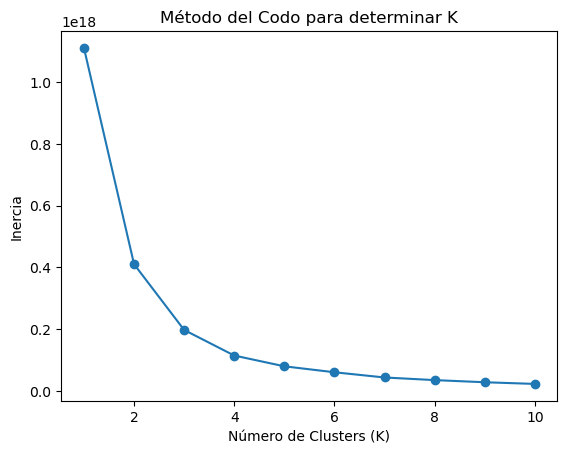

In [30]:
fifa_codo = np.random.rand(100, 2)

# Rango de valores de K que probamos
k_values = range(1, 11)

# Calculo de la inercia para diferentes valores de K
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fifa)
    inertia.append(kmeans.inertia_)

#  Curva del codo
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar K')
plt.show()


In [31]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(fifa)  # Reemplaza X con tus datos

# Calcula la puntuación de silueta
silhouette_avg = silhouette_score(X, labels)
print(f"Puntuación de silueta: {silhouette_avg}")


Puntuación de silueta: 0.8595511214174798


Silhouette score: 0,85 quiere decir que los clústeres están bien separados por lo que funciona el modelo con 4

Probamos KMEANS con 3 centroides

In [33]:
num_clusters = 3

# Crea un objeto KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

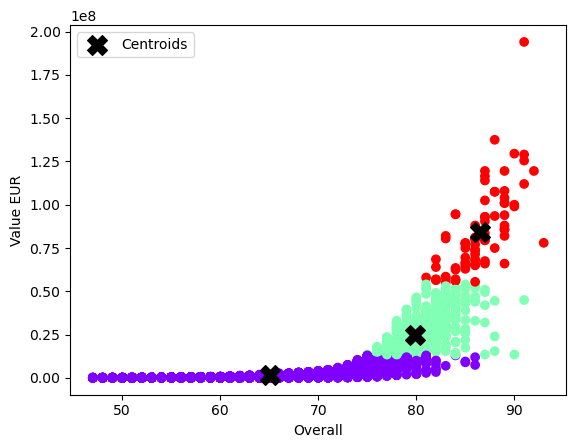

In [129]:
# Aplicamos K-Means y entrenamos el modelo
kmeans.fit(X)

# Etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Coordenadas de los centroides de los clusters
centroids = kmeans.cluster_centers_

# Plotea los datos y los clusters encontrados
plt.scatter(X['overall'], X['value_eur'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Overall')
plt.ylabel('Value EUR')
plt.legend()
plt.show()

In [34]:
fifa = fifa.dropna()

In [37]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(fifa)  # Reemplaza X con tus datos

# Calcula la puntuación de silueta
silhouette_avg = silhouette_score(X, labels)
print(f"Puntuación de silueta: {silhouette_avg}")

Puntuación de silueta: 0.8595511214174798


Silhouette score: 0,89 quiere decir que con 3 clusteres tiene menor rendimiento que con 4

A continuación probamos conn 2 clusters

In [38]:
num_clusters = 2

# Crea un objeto KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

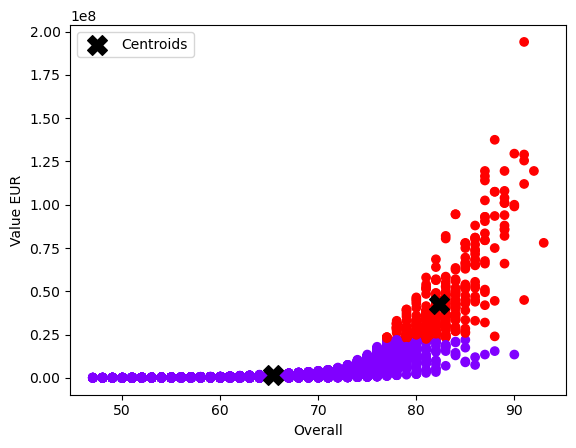

In [39]:
# Aplicamos K-Means y entrenamos el modelo
kmeans.fit(X)

# Etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Coordenadas de los centroides de los clusters
centroids = kmeans.cluster_centers_

# Plotea los datos y los clusters encontrados
plt.scatter(X['overall'], X['value_eur'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Overall')
plt.ylabel('Value EUR')
plt.legend()
plt.show()

In [40]:
fifa = fifa.dropna()

In [43]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(fifa)  # Reemplaza X con tus datos

# Calcula la puntuación de silueta
silhouette_avg = silhouette_score(X, labels)
print(f"Puntuación de silueta: {silhouette_avg}")

Puntuación de silueta: 0.9247686297948562


Silhouette score: 0,92 quiere decir que con 2 clusteres tiene menor rendimiento que con 4

<font size=5>  👩🏽‍💻 Conclusion </font>

Con 4 cluster el Silhouette score: 0,85 quiere decir que los clústeres están bien separados por lo que funciona el modelo con 4.
Este modelo nos permitió agrupar a los jugadores según el overall, es decir, el desempeño que tienen los mismos y su valor económico establecido en el mercado. Los que tienen un rendimiento mayor tienen un valor de transferencia mayor.     